In [1]:
import pandas as pd
import numpy as np
# To carry out MDS
from sklearn import manifold
# For graphical representation
import matplotlib.pyplot as plt
# For calculating euclidean distance between the brands
from scipy.spatial.distance import pdist, squareform
# For Clustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [45]:
# Function to find distance betweeen data points
def euclidean_distance_matrix(df):
    return squareform(pdist(df.values))

In [46]:
# Bringing in brands data
data = pd.read_csv("fashion_brands.csv", index_col="brand")
data.head()

,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic
brand,,,,,,,,,
Chanel,449,252,106,236,61,13,8,29,16
Louis Vuitton,410,286,83,142,80,18,20,48,31
Christian Dior,356,200,95,206,67,19,18,27,9
Tiffany,362,219,103,187,59,55,36,35,10
Rolex,442,248,114,89,109,4,9,52,12


In [65]:
# Standardize the values
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

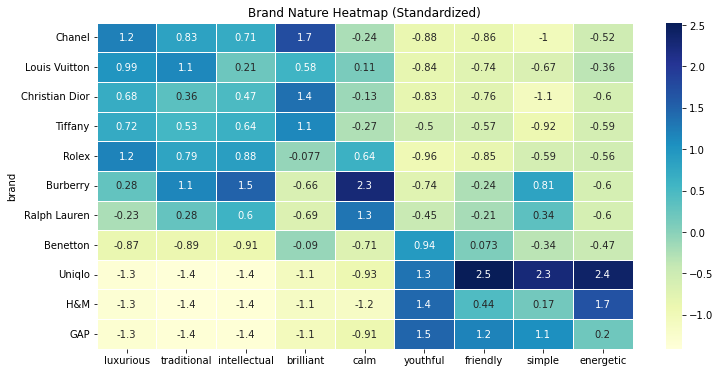

In [66]:
# Create a heatmap using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(scaled_data, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Brand Nature Heatmap (Standardized)")
plt.show()

In [69]:
# Select the top natures for each brand
top_n = 3  # Change this value to select a different number of top natures

top_natures = scaled_data.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)

# Print the fitting nature(s) for each brand
for brand, natures in top_natures.items():
    print(f"{brand}: {', '.join(natures)}")

Chanel: brilliant, luxurious, traditional
Louis Vuitton: traditional, luxurious, brilliant
Christian Dior: brilliant, luxurious, intellectual
Tiffany: brilliant, luxurious, intellectual
Rolex: luxurious, intellectual, traditional
Burberry: calm, intellectual, traditional
Ralph Lauren: calm, intellectual, simple
Benetton: youthful, friendly, brilliant
Uniqlo: friendly, energetic, simple
H&M: energetic, youthful, friendly
GAP: youthful, friendly, simple


In [59]:
# Making distance matrix
distance_matrix = euclidean_distance_matrix(scaled_data)
print(distance_matrix)

[[0.         1.42492212 0.85768406 0.97823665 2.06812884 4.1710825
  3.63946633 4.26580445 7.74244306 6.19137462 6.19747081]
 [1.42492212 0.         1.29237012 1.15606664 1.1746529  3.2928925
  2.64033833 3.73042613 7.04970378 5.51215495 5.48507821]
 [0.85768406 1.29237012 0.         0.54844052 1.87731528 3.93511331
  3.10416194 3.56650681 7.25802343 5.58706089 5.57168957]
 [0.97823665 1.15606664 0.54844052 0.         1.73721471 3.75486085
  2.9246518  3.39130644 7.01754413 5.39155231 5.33395108]
 [2.06812884 1.1746529  1.87731528 1.73721471 0.         2.58660665
  2.17231962 4.07661073 7.29400444 5.79657574 5.71111057]
 [4.1710825  3.2928925  3.93511331 3.75486085 2.58660665 0.
  1.74227189 4.97754918 7.12680591 6.34042324 5.91372944]
 [3.63946633 2.64033833 3.10416194 2.9246518  2.17231962 1.74227189
  0.         3.32549459 6.03841118 4.85000826 4.43150745]
 [4.26580445 3.73042613 3.56650681 3.39130644 4.07661073 4.97754918
  3.32549459 0.         4.78283991 2.69538525 2.34989719]
 [

In [60]:
# Carrying out Multi Dimensional Scaling
mds = manifold.MDS(n_components=2, metric=True, dissimilarity="precomputed", random_state=42)
results = mds.fit(distance_matrix)

# Saving the brand names from the index in "brands"
brands = data.index
print(brands)

Index(['Chanel', 'Louis Vuitton', 'Christian Dior', 'Tiffany', 'Rolex',
       'Burberry', 'Ralph Lauren', 'Benetton', 'Uniqlo', 'H&M', 'GAP'],
      dtype='object', name='brand')


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [61]:
# Generating coordinates from the mds results
coords = results.embedding_
print(coords)

[[ 0.03932424 -3.02417052]
 [ 0.68794477 -1.95114452]
 [-0.26360397 -2.3812768 ]
 [-0.15917114 -2.0622458 ]
 [ 1.52796187 -1.79088467]
 [ 3.27694112 -0.30148024]
 [ 1.6809337   0.17989771]
 [-1.77281182  0.62453137]
 [-0.74505201  5.15712218]
 [-2.74541547  2.55496404]
 [-1.52705129  2.99468725]]


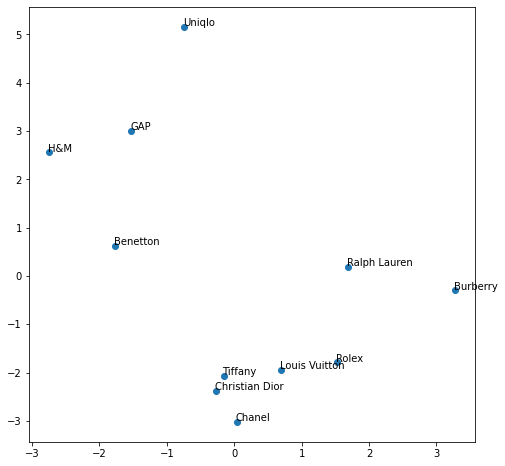

In [62]:
# Plotting on a graph to identify how the brands are distributed
fig = plt.figure(figsize=(8, 8))
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-1, 1),
        textcoords='offset points'
    )

plt.show()

3 clusters visible from the above graph: (Burberry, Ralph Lauren), (Uniqlo, Benetton, H&M, and GAP), (Rolex, Tiffany, Christian Dior, Chanel and Louis Vuitton)
